85 221


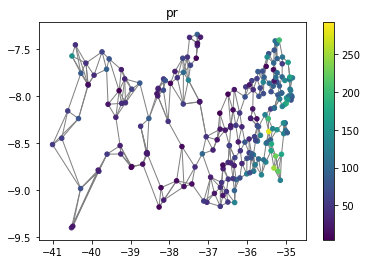

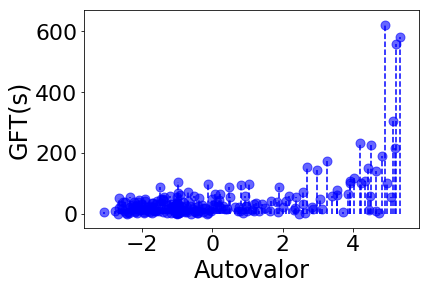

In [19]:
# Desenvolvido em python (jupyter)

#
# Neste código são plotados vértices (coloridos de acordo com o valor do sinal atribuído) e arestas de um grafo bidirecional 
# Cada vértice representa um condado dos EUA e as arestas são ponderadas usando a distância euclideana como parâmetro
# principal. 

# Para que o código funcione é precio instalar as bibliotecas abaixo. 

###
import csv
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from pygsp import *
from gspy import *

###
# Abrindo o arquivo csv com os dados necessários e armazenando os valores numa matriz para trabalhar com os dados no
# código. O arquivo csv neste caso é o baixado diretamente do datausa.io.
columns_signal = defaultdict(list) 

with open('PE_pluviometria.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        for (i,v) in enumerate(row):
            columns_signal[i].append(v)
            

l = len(columns_signal[0])

###
# Abrindo o arquivo csv com os dados necessários e armazenando os valores numa matriz para trabalhar com os dados no
# código. O arquivo csv neste caso contém a identificação, latitude e longitude de cada condado.
columns_coordinates = defaultdict(list) 

with open('Coordenadas_das_estacoes.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        for (i,v) in enumerate(row):
            columns_coordinates[i].append(v)
            

k = len(columns_coordinates[0])

###
# Variável auxiliar usada para indexar corretamente os elementos de B[][]
aux = 0

# Matriz para armazenar os dados desejados. B[][0] contém o FIPS, B[][1] contém a latitude, B[][2] a longitude
# e B[][3] o sinal
B = np.zeros((l,3))

# Processo de busca    
for j in range (0,l):
# Em caso de não existir valor atribuído a um condado, tira-se print do índice do sinal e nada é armazenado em B[][]             
    if (columns_signal[3][j] != '-'):
        B[j][0] = float(columns_coordinates[2][j])
        B[j][1] = float(columns_coordinates[3][j])
        B[j][2] = float(columns_signal[3][j])
    else:
        B[j][0] = float(columns_coordinates[2][j])
        B[j][1] = float(columns_coordinates[3][j])
        B[j][2] = 0.0

###
coords = np.zeros((len(B),2))
s = np.zeros((len(B),1))

for p in range(0,len(B)):
    coords[p][1] = B[p][0]
    coords[p][0] = B[p][1]
    s[p] = B[p][2]

###
# Criando matriz de adjacência usando a biblioteca gspy
###Matriz simétrica
#Matriz de Adjacência K mais próximos
from scipy.spatial import distance
import numpy as np

Adj_K2 = np.zeros((len(B),len(B)))
C = np.zeros((len(B),1))
K = 4
aux = 0

ind=np.zeros((K,1))
for x in range(0,len(B)):
    for y in range(0,len(B)):
        v = [coords[x][0],coords[x][1]]
        w = [coords[y][0],coords[y][1]]
        dst = distance.euclidean(v,w)
        C[y]=dst
    ind = sorted(C)[1:K+1]
    for i in range(0,K):
        ind[i] = np.where(C == ind[i])
    for j in range(0,K):
        aux = ind[j][0]
        Adj_K2[x][int(aux)] = np.exp((-C[ind[j]]**2))
        Adj_K2[int(aux)][x] = Adj_K2[x][int(aux)]

A = Adj_K2
# Definindo o grafo por meio da matriz de adjacência

G = graphs.Graph(A)

# Setando as coordenadas dos nós

G.set_coordinates(coords)

# Plota-se agora os nós nas devidas coordenadas com os respectivos sinais e as arestas ponderadas anteriormente
# por meio da biblioteca gspy

plotting.plot_signal(G, s, vertex_size = 20, plot_name = 'pr',save_as = 'pr')

###
fsize = 24 # plot axis font size
msize = 14 # marker size
csize = fsize - 2 # colorbar label size
graph_node_size = 80

eigvals,V = np.linalg.eig(A)

Vinv = np.linalg.inv(V)

eigval_abs_max = np.max(np.abs(eigvals))

index_eig_sort = np.argsort(np.abs(eigvals - eigval_abs_max))

ss = np.dot(Vinv,s) #GFT

# A GFT é plotada
plt.figure()

stem(eigvals[index_eig_sort],np.abs(ss[index_eig_sort]),fsize=18,msize=8,color='b',linestyle='--',labelstr=0,alph=0.6)

plt.xlabel('Autovalor',fontsize=fsize)
plt.ylabel('GFT(s)',fontsize=fsize)
plt.tick_params(labelsize=fsize-2)
plt.axis('tight')

#li = np.where(eigvals > 0.02)
e = np.where(np.abs(ss) > 30)
print(len(e[0]),len(s))
#print(len(li[0]),len(e[0]))
#print(V[eigvls < 0.001,:])

In [41]:
#e = np.where(np.abs(ss) > 10)
#print(len(e[0]),len(ss))

V2 = V[:,:][:,e[0]]

So = np.zeros((len(e[0]),len(V2))) 

for i in range(len(e[0])):
    So[i][i] = 1

###
#a = np.zeros((1,len(V2)))
#b = np.zeros((len(V2),len(V2)))

#for j in range(len(V2)):
#    a[0,j] = 1
#    b[j] = a
#    a = np.zeros((1,len(V2)))

#Psi = np.zeros((1,len(e[0]),len(V2)))

#for j in range(len(e[0])):
#    Psi[0][j] = b[e[0][j]]
###

#So = Psi[0]

C = np.dot(So,V2)
C = np.linalg.inv(C)

R = np.dot(V2,C)

xM = np.dot(So,s) 

x_n = np.dot(R,xM)

#for j in range(len(So)):
#    print(So[i][i])
print(len(e[0]),"\n\n")

#for j in range(len(V2)):
#    if np.abs(x_n[j]/s[j]) < 0.7 or np.abs(x_n[j]/s[j]) > 1.3:
#        print(j) 

221 




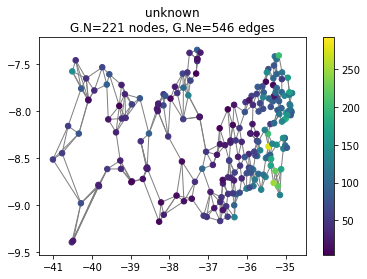

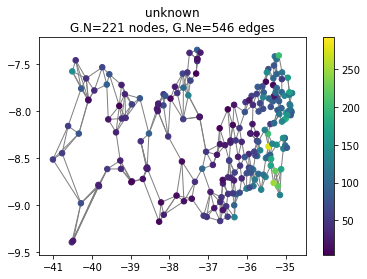

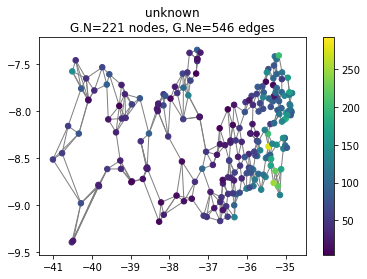

In [53]:
xM_ = np.zeros((1,len(V2)))
aux = 0
for i in range(len(V2)):
    if np.sum(So[:,i]) == True:  
        xM_[0][i] = xM[aux]
        aux = aux + 1

plotting.plot_signal(G, s, vertex_size = 30)
plotting.plot_signal(G, xM_, vertex_size = 30)
plotting.plot_signal(G, x_n, vertex_size = 30)

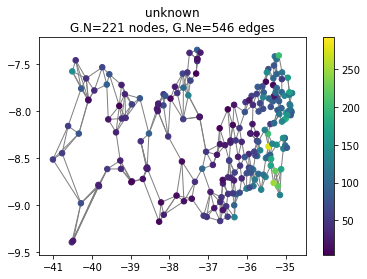

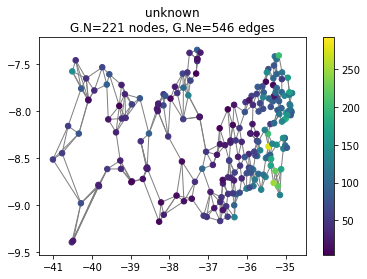

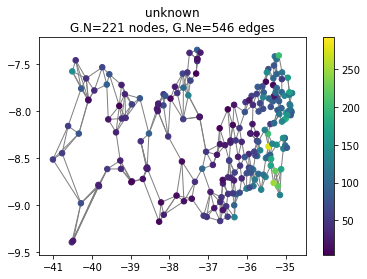

In [54]:
from itertools import combinations 
import operator

def optimal_sampling_operator(M,V2):
    a = np.zeros((1,len(V2)))
    b = np.zeros((len(V2),len(V2)))

    for j in range(len(V2)):
        a[0,j] = 1
        b[j] = a
        a = np.zeros((1,len(V2)))

    cb = np.arange(len(V2))
    comb = combinations(cb, M)
    len_ = len(list(combinations(cb, M)))

    Psi = np.zeros((len_,M,len(V2)))

    k = 0
    for i in list(comb):
        for j in range(M):
            Psi[k][j] = b[i[j]]
        k = k + 1

    lst = []
    for i in range(k):
        C = np.dot(Psi[i],V2)
        u, s, vh = np.linalg.svd(C, full_matrices=True)
        lst.append(np.min(s))

    index, value = max(enumerate(lst), key=operator.itemgetter(1))

    return (Psi[index])

def optimal_sampling_operator_greedy_algorithm(M,V2):

    import numpy as np
    import operator

    lst = []
    Psi = np.zeros((M,len(V2)))
    a = np.zeros((1,len(V2)))
    b = np.zeros((len(V2),len(V2)))
    V = V2
    
    for j in range(len(V2)):
        a[0,j] = 1
        b[j] = a
        a = np.zeros((1,len(V2)))
    
    k = 0
    while k < M:
        for i in range(len(V2)):
            u, s, vh = np.linalg.svd([V2[i]], full_matrices=True)
            lst.append(np.min(s))

        index, value = max(enumerate(lst), key=operator.itemgetter(1))
        ind = np.where((V == V2[index]).all(axis=1))
        V2 = np.delete(V2, (index), axis=0)
        Psi[k] = b[ind[0]]
        k=k+1
        lst = []
    
    return(Psi)

R1 = optimal_sampling_operator_greedy_algorithm(len(e[0]),V2)

Co = np.dot(R1,V2)
Co = np.linalg.inv(Co)

I = np.dot(V2,Co)

xMo = np.dot(R1,s) 

x_r = np.dot(I,xMo)

xM_ = np.zeros((1,len(V2)))
aux = 0
for i in range(len(V2)):
    if np.sum(R1[:,i]) == True:  
        xM_[0][i] = xM[aux]
        aux = aux + 1

plotting.plot_signal(G, s, vertex_size = 30)
plotting.plot_signal(G, xM_, vertex_size = 30)
plotting.plot_signal(G, x_r, vertex_size = 30)

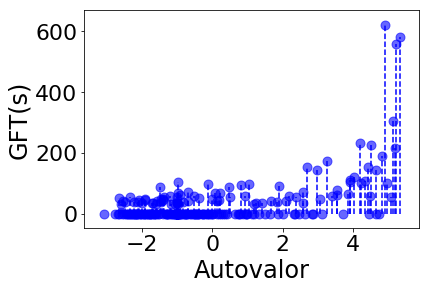

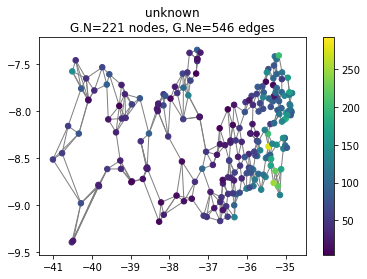

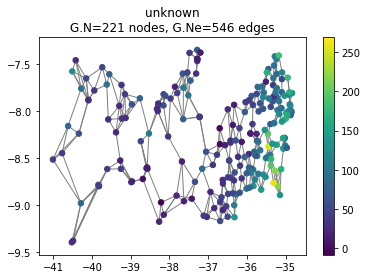

In [20]:
I_r = np.zeros((len(A),len(A)))
rd = len(e[0])

for i in range(len(e[0])):
    I_r[e[0][i]][e[0][i]] = 1

Pr = np.dot(V,I_r)
Pr = np.dot(Pr,Vinv)

xr = np.dot(Pr,s)

xr_gft = np.dot(Vinv,xr) #GFT

# A GFT é plotada
plt.figure()

stem(eigvals[index_eig_sort],np.abs(xr_gft[index_eig_sort]),fsize=18,msize=8,color='b',linestyle='--',labelstr=0,alph=0.6)

plt.xlabel('Autovalor',fontsize=fsize)
plt.ylabel('GFT(s)',fontsize=fsize)
plt.tick_params(labelsize=fsize-2)
plt.axis('tight')

plotting.plot_signal(G, s, vertex_size = 30)
plotting.plot_signal(G, xr, vertex_size = 30)

In [21]:
k = 0
for i in range(len(s)):
    if np.abs(xr[i]/s[i]) > 1.35 or np.abs(xr[i]/s[i]) < 0.65:
        print(xr[i],s[i],k)
        k=k+1

[25.24160911] [43.1] 0
[40.45056026] [19.7] 1
[27.74366402] [43.4] 2
[18.7402147] [8.] 3
[38.26132863] [9.9] 4
[18.54530267] [29.5] 5
[30.48825823] [13.4] 6
[12.09517296] [23.4] 7
[12.29651521] [29.6] 8
[39.70387632] [9.3] 9
[42.97855072] [29.7] 10
[12.21472927] [26.] 11
[16.94096287] [11.9] 12
[24.18131408] [11.2] 13
[1.87223891] [16.] 14
[12.52554149] [26.] 15
[27.51825201] [5.5] 16
[21.92949431] [7.3] 17
[16.37877175] [8.6] 18
[28.16436079] [12.2] 19
[-2.21659184] [23.2] 20
[-2.10952271] [4.] 21
[17.0107384] [26.8] 22
[38.79548987] [20.6] 23
[15.26676791] [25.] 24
[81.01585197] [55.] 25
[42.67217858] [31.1] 26
[7.97805518] [35.] 27
[81.40520003] [58.6] 28
[25.94023709] [5.] 29
[36.18055379] [12.1] 30
[36.74651272] [22.] 31
[29.42064266] [6.] 32
[41.24965539] [21.9] 33
